# Introdução à Análise de Sobrevivência

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

* Introdução à Análise de Sobrevivência
  * Conceitos Básicos
  * Modelos de Sobrevivência
  * Modelos Não-Paramétricos
  * Modelos Semi-Paramétricos
  * Modelos Paramétricos


**Referências**

* Cameron e Triverdi – Microeconometrics using stata. 
  * Capítulo 16 – Tobit and Selection models
  * Capítulo 17 – Count Data Models
* Cameron e Triverdi – Microeconometrics, Methods and Aplication
  * Capítulo 16 – Tobit and Selection models

## Introdução à Análise de Sobrevivência

A **Análise de Sobrevivência** é um método estatístico utilizado para estudar o tempo até a ocorrência de um evento de interesse, como a falha de um equipamento, a morte de um paciente, ou a reincidência de uma doença. O objetivo principal é estimar a probabilidade de sobrevivência em determinados momentos ao longo do tempo. Esse tipo de análise é amplamente utilizado em diversas áreas, incluindo medicina, economia, engenharia e ciências sociais.

### Conceitos Fundamentais

1. **Tempo de Falha e Censura**:
    - **Tempo de Falha**: Refere-se ao tempo decorrido até a ocorrência do evento de interesse (por exemplo, até que um paciente receba um tratamento ou até a morte).
    - **Censura**: A censura ocorre quando não é possível observar o tempo exato do evento de interesse. Isso pode acontecer, por exemplo, se um estudo termina antes que todos os eventos tenham ocorrido ou se um indivíduo abandona o estudo. Existem três tipos principais de censura:
        - **Censura à Direita**: O evento de interesse não é observado dentro do período de estudo, mas pode ocorrer posteriormente.
        - **Censura à Esquerda**: O início do evento não é observado; apenas se sabe que ele ocorreu antes de um certo ponto no tempo.
        - **Censura Intervalar**: O evento ocorreu em algum momento dentro de um intervalo de tempo, mas o instante exato não é conhecido.

2. **Tipos de Censura à Direita**:
    - **Censura Tipo I**: O estudo termina após um período preestabelecido.
    - **Censura Tipo II**: O estudo termina após um número predefinido de eventos.
    - **Censura Aleatória**: O evento de interesse não é observado devido a razões não controladas pelo estudo, como morte por causas externas.

### Funções Fundamentais na Análise de Sobrevivência

1. **Função Densidade de Probabilidade (PDF)**:
    - A densidade de probabilidade descreve a distribuição dos tempos até o evento de interesse. Para um tempo de sobrevivência $ T $, que é uma variável aleatória contínua e não negativa, a função densidade de probabilidade $ f(t) $ é dada pela derivada da função de distribuição acumulada $ F(t) $, isto é, $ f(t) = \frac{dF(t)}{dt} $.
    - A função $ F(t) $ representa a probabilidade de o evento ocorrer até o tempo $ t $, e $ f(t) $ nos dá a probabilidade de o evento ocorrer em um pequeno intervalo de tempo ao redor de $ t $.

2. **Função de Sobrevivência $ S(t) $**:
    - A função de sobrevivência indica a probabilidade de um indivíduo não ter experimentado o evento de interesse até o tempo $ t $. É definida como $ S(t) = P(T > t) $.
    - Esta função é complementar à função de distribuição acumulada, ou seja, $ S(t) = 1 - F(t) $.
    - Algumas propriedades importantes são $ S(0) = 1 $ (no tempo inicial, todos os indivíduos estão "vivos") e $ S(\infty) = 0 $ (eventualmente, todos os indivíduos experimentarão o evento de interesse).

3. **Função de Risco $ h(t) $**:
    - A função de risco, ou taxa de falha instantânea, representa a probabilidade de um evento ocorrer em um intervalo de tempo infinitesimal, dado que o indivíduo sobreviveu até o tempo $ t $. Formalmente, é dada por:
    $$
    h(t) = \lim_{\Delta t \to 0} \frac{P(t \leq T < t + \Delta t | T \geq t)}{\Delta t}
    $$
    - A função de risco pode ser derivada a partir da função densidade de probabilidade e da função de sobrevivência: $ h(t) = \frac{f(t)}{S(t)} $.
    - Dependendo do contexto, a função de risco pode aumentar, diminuir, ser constante ou ter um formato em U, refletindo diferentes padrões de risco ao longo do tempo.

### Modelos de Sobrevivência

Os modelos de sobrevivência são usados para analisar dados de tempo até o evento de interesse. Esses modelos podem ser:

1. **Modelos Paramétricos**:
    - Supõem que o tempo até o evento segue uma distribuição de probabilidade conhecida (como exponencial, Weibull ou log-normal). Esses modelos são úteis quando há uma forte suposição sobre a distribuição do tempo de sobrevivência.

2. **Modelos Não-Paramétricos**:
    - Não fazem suposições específicas sobre a distribuição do tempo até o evento. São úteis para descrever a função de sobrevivência sem considerar regressores.
    - **Estimador de Kaplan-Meier**: É o estimador não-paramétrico mais comum para a função de sobrevivência, especialmente em presença de censura.
    - **Estimador de Nelson-Aalen**: Outro método não-paramétrico, utilizado para estimar a função de risco acumulada.

3. **Modelos Semiparamétricos**:
    - Combinam aspectos dos modelos paramétricos e não-paramétricos. O modelo de Cox (proporcional hazards) é o exemplo mais comum, que não assume uma forma específica para a função de risco, mas modela os efeitos dos covariáveis sobre o risco.



### Modelos Semi-paramétricos

Os modelos semi-paramétricos, como o **Modelo de Cox** (1972), são amplamente utilizados em análise de sobrevivência porque não fazem suposições específicas sobre a forma da função de risco ao longo do tempo. No entanto, esses modelos assumem que as covariáveis têm um efeito multiplicativo na função de risco. Em outras palavras, o modelo de Cox pressupõe que as taxas de risco são proporcionais entre os indivíduos durante todo o período de análise.

#### Estrutura do Modelo de Cox

O **Modelo de Cox**, também conhecido como **Modelo de Riscos Proporcionais (PH)**, é expresso pela seguinte equação:

$$
h(t|X) = h_0(t) \cdot g(X' \beta)
$$

- $ h(t|X) $ é a função de risco condicional no tempo $ t $, dado o vetor de covariáveis $X $.
- $ h_0(t) $ é a **função de risco base**, que representa o componente não-paramétrico do modelo. Ela é comum a todos os indivíduos e não depende das covariáveis.
- $ g(X' \beta) $ é o componente paramétrico do modelo e representa o efeito das covariáveis sobre o risco. $X' \beta $ é uma combinação linear das covariáveis com os coeficientes $ \beta $.

#### Propriedades do Modelo de Cox

1. **Função de Risco Base**: 
    - A função de risco base $ h_0(t) $ é a mesma para todos os indivíduos e não depende das covariáveis. Ela é deixada não especificada no modelo de Cox, permitindo uma flexibilidade significativa.

2. **Função Exponencial**:
    - Para garantir que a função de risco seja sempre não negativa, $ g(X' \beta) $ é definida como uma função exponencial das covariáveis:
    $$
    h(t|X) = h_0(t) \cdot \exp(X' \beta)
    $$
    - Isso implica que as covariáveis $ X $ têm um efeito multiplicativo na função de risco.

3. **Proporcionalidade dos Riscos**:
    - A característica central do modelo de Cox é a suposição de **proporcionalidade dos riscos**. Isso significa que a razão de risco entre dois indivíduos, $i $ e $ j $, é constante ao longo do tempo. A razão de risco é dada por:
    $$
    \frac{h_i(t)}{h_j(t)} = \exp(X_i' \beta - X_j' \beta)
    $$
    - Como $ h_0(t) $ é comum a ambos os indivíduos, ela se cancela na razão, e a diferença nos riscos entre os indivíduos é explicada apenas pelas covariáveis $X $.

#### Interpretação

- **Coeficientes $ \beta $**:
    - Cada coeficiente $ \beta_k $ no modelo representa o logaritmo da razão de risco associada à covariável $ X_k $. Um coeficiente positivo indica que a covariável aumenta o risco (reduz o tempo de sobrevivência), enquanto um coeficiente negativo sugere que a covariável reduz o risco (aumenta o tempo de sobrevivência).

- **Razão de Risco**:
    - A **razão de risco** ($\text{Hazard Ratio} $) para uma covariável é obtida pela exponenciação do coeficiente correspondente: $ \exp(\beta_k) $. Uma razão de risco maior que 1 indica um risco aumentado com o aumento da covariável, enquanto uma razão de risco menor que 1 indica um risco reduzido.

#### Aplicações do Modelo de Cox

O modelo de Cox é amplamente utilizado em estudos de sobrevivência, especialmente em contextos onde não se deseja especificar a forma exata da função de risco. É particularmente útil em estudos médicos, como na análise do tempo até a recidiva de uma doença, e em outras áreas onde o tempo até a ocorrência de um evento é uma variável crucial.


### Modelos Paramétricos

Os **modelos paramétricos** em análise de sobrevivência assumem que os tempos até a ocorrência de um evento seguem uma distribuição de probabilidade específica. As distribuições mais comuns incluem a Exponencial, Gompertz, Weibull, Log-normal, Log-logística e Gama. Embora esses modelos sejam relativamente simples de estimar, há um risco de produzir estimativas incorretas se a distribuição escolhida não representar bem os dados. Portanto, uma prática recomendada é selecionar formas funcionais que sejam mais flexíveis, oferecendo alguma proteção contra erros de especificação.

#### Efeitos das Covariáveis

Nos modelos paramétricos, a influência das covariáveis na função de risco base pode ocorrer de duas maneiras principais:

1. **Efeito Multiplicador sobre a Taxa de Risco (Modelos PH):**
   - Nesse caso, as covariáveis influenciam multiplicativamente a taxa de risco, semelhante ao modelo de riscos proporcionais (PH) de Cox. A função de risco base é comum a todos os indivíduos, mas é ajustada para cima ou para baixo com base nas covariáveis. A diferença aqui é que, nos modelos paramétricos, a taxa de risco segue uma distribuição conhecida.
   
   $$
   h(t|X) = h_0(t) \cdot \exp(X' \beta)
   $$

2. **Efeito Multiplicador sobre o Fator Tempo (Modelos AFT):**
   - Nos modelos de **tempo de falha acelerado (AFT)**, as covariáveis afetam diretamente o tempo até a ocorrência do evento. Especificamente, elas aceleram ou desaceleram o tempo de falha. A função de risco é ajustada de acordo com o fator tempo influenciado pelas covariáveis:
   
   $$
   h(t|X) = h_0\left(\frac{t}{\exp(X' \beta)}\right) \cdot \exp(X' \beta)
   $$
   
   - O tempo é considerado acelerado se o fator multiplicador for maior que um, indicando uma redução no tempo esperado para a ocorrência do evento. Inversamente, o tempo é desacelerado se o fator for menor que um.

   Em resumo:
   - $ \exp(-X' \beta) > 1 $ implica tempo acelerado.
   - $ \exp(-X' \beta) < 1 $ implica tempo desacelerado.
   - $ \beta > 0 $ indica desaceleração do tempo.
   - $ \beta < 0 $ indica aceleração do tempo.

#### Principais Distribuições Paramétricas

1. **Distribuição Exponencial:**
   - Uma das distribuições mais simples, caracteriza-se por uma função de risco constante. O parâmetro $ \lambda $ representa a taxa de ocorrência de eventos. Um valor alto de $\lambda $ indica um alto risco e baixa sobrevivência, enquanto um valor baixo indica baixo risco e alta sobrevivência.

2. **Distribuição Weibull:**
   - Introduzida por Wallodi Weibull (1939), é uma generalização do modelo exponencial, com dois parâmetros positivos. O segundo parâmetro, $ p $, traz flexibilidade ao modelo, permitindo diferentes formas da função de risco. Quando $ p = 1 $, a distribuição Weibull se reduz à distribuição exponencial.

3. **Distribuição Gompertz:**
   - Introduzida por Benjamin Gompertz (1825), também é uma generalização do modelo exponencial com dois parâmetros. O parâmetro $ \gamma $ proporciona flexibilidade adicional, permitindo que a função de risco assuma diferentes formas. Quando $ \gamma = 0 $, o modelo se reduz ao exponencial. Este modelo é particularmente útil em situações onde a taxa de risco aumenta exponencialmente com o tempo.

4. **Distribuição Log-normal:**
   - O logaritmo de uma variável que segue uma distribuição Log-normal tem uma distribuição normal com média $ \mu $ e desvio padrão $ \sigma $. A distribuição Log-normal é apropriada para descrever situações em que a taxa de falha aumenta inicialmente, atinge um pico e depois diminui, indicando uma relação não monótona entre a taxa de risco e a duração.

5. **Distribuição Gama Generalizada:**
   - Caracterizada por três parâmetros positivos ($ \lambda $, $p $, e $ k $), a distribuição Gama Generalizada oferece uma grande flexibilidade na modelagem de tempos de falha, podendo acomodar uma ampla variedade de formas de funções de risco.

### Aplicação em Python


`pip install lifelines`
https://lifelines.readthedocs.io/en/latest/index.html

`pip install pycox`
https://github.com/havakv/pycox


In [18]:
from lifelines.fitters import ParametricUnivariateFitter

import autograd.numpy as np

class InverseTimeHazardFitter(ParametricUnivariateFitter):

    # we tell the model what we want the names of the unknown parameters to be
    _fitted_parameter_names = ['alpha_']


    # this is the only function we need to define. It always takes two arguments:
    #   params: an iterable that unpacks the parameters you'll need in the order of _fitted_parameter_names
    #   times: a vector of times that will be passed in.
    def _cumulative_hazard(self, params, times):
        alpha = params[0]
        return alpha /(80 - times)

<lifelines.InverseTimeHazardFitter:"InverseTimeHazard_estimate", fitted with 163 total observations, 7 right-censored observations>
   number of observations = 163
number of events observed = 156
           log-likelihood = -697.84
               hypothesis = alpha_ != 1

---
        coef  se(coef)  coef lower 95%  coef upper 95%
alpha_ 21.51      1.72           18.13           24.88

        cmp to     z      p  -log2(p)
alpha_    1.00 11.91 <0.005    106.22
---
AIC = 1397.68

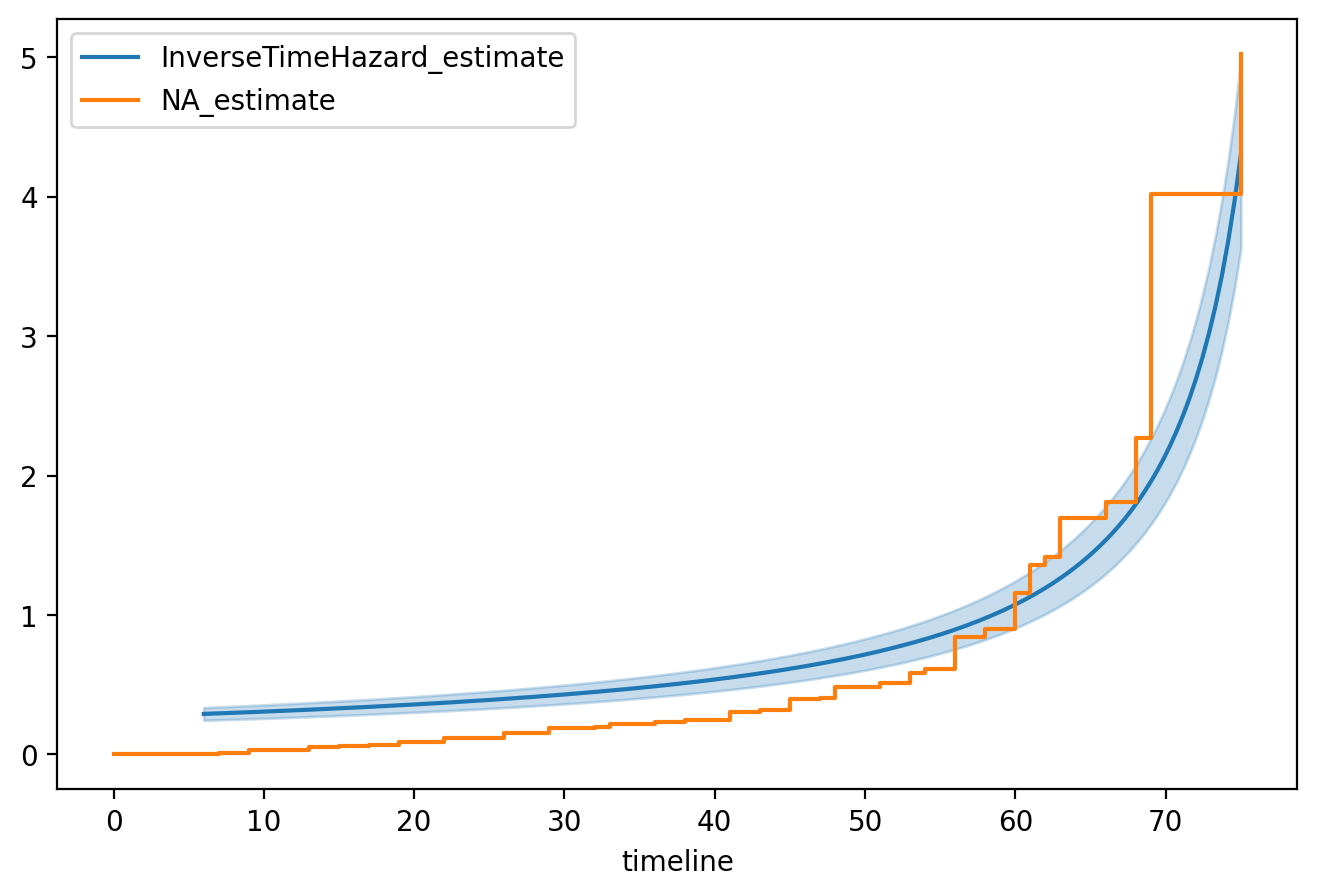

In [19]:
itf = InverseTimeHazardFitter()
itf.fit(T, E)
itf.print_summary()

ax = itf.plot(figsize=(8,5))
ax = naf.plot(ax=ax, ci_show=False)
plt.legend()

In [20]:
class TwoParamInverseTimeHazardFitter(ParametricUnivariateFitter):

    _fitted_parameter_names = ['alpha_', 'beta_']

    # Sequence of (min, max) pairs for each element in x. None is used to specify no bound
    _bounds = [(0, None), (75.0001, None)]

    def _cumulative_hazard(self, params, times):
        alpha, beta = params
        return alpha / (beta - times)

<lifelines.TwoParamInverseTimeHazardFitter:"TwoParamInverseTimeHazard_estimate", fitted with 163 total observations, 7 right-censored observations>
   number of observations = 163
number of events observed = 156
           log-likelihood = -685.57
               hypothesis = alpha_ != 1, beta_ != 76.0001

---
        coef  se(coef)  coef lower 95%  coef upper 95%
alpha_ 16.50      1.51           13.54           19.45
beta_  76.55      0.38           75.80           77.30

        cmp to     z      p  -log2(p)
alpha_    1.00 10.28 <0.005     79.99
beta_    76.00  1.44   0.15      2.73
---
AIC = 1375.14

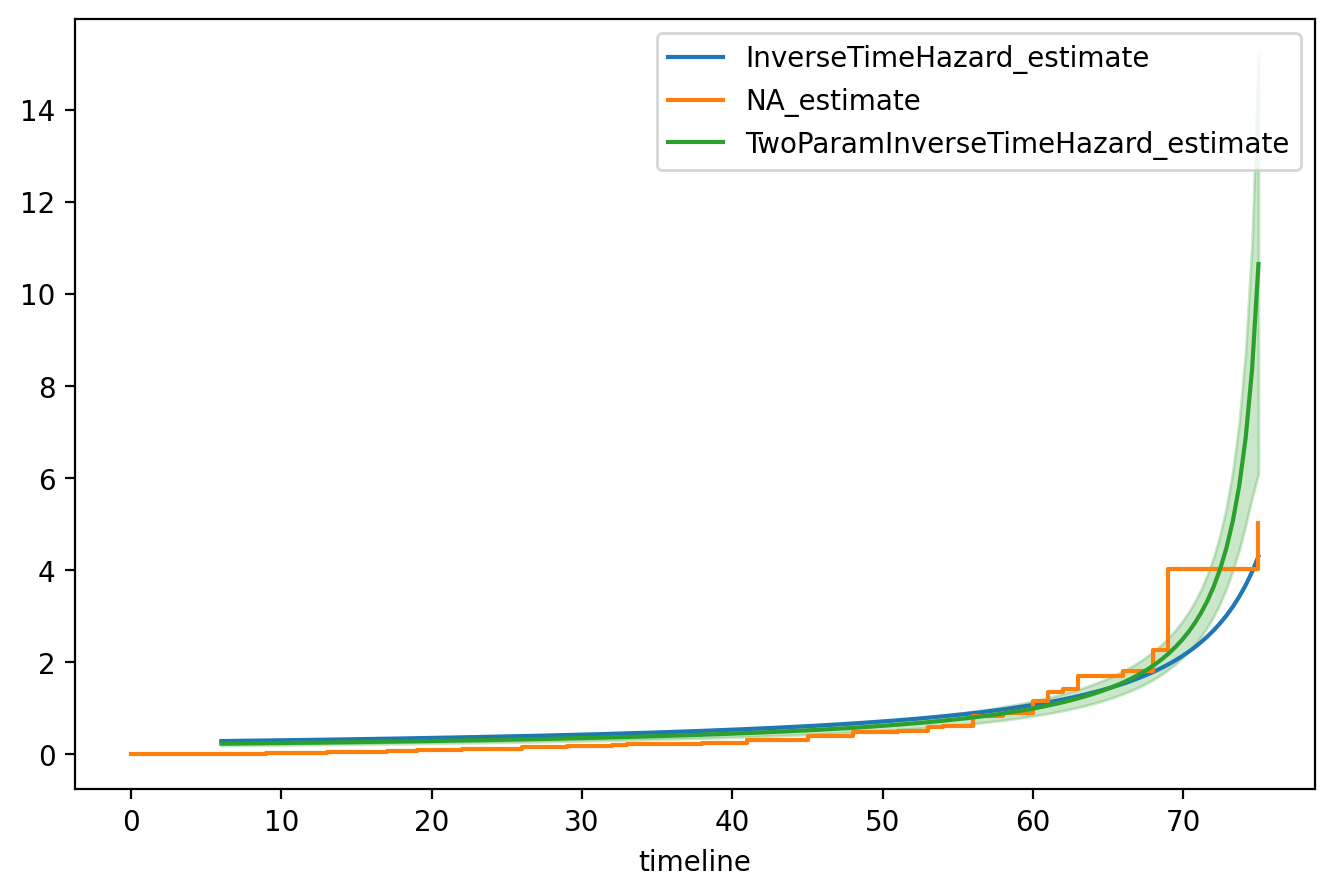

In [21]:
two_f = TwoParamInverseTimeHazardFitter()
two_f.fit(T, E)
two_f.print_summary()

ax = itf.plot(ci_show=False, figsize=(8,5))
ax = naf.plot(ax=ax, ci_show=False)
two_f.plot(ax=ax)
plt.legend()

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from lifelines.datasets import load_waltons
waltons = load_waltons()
T, E = waltons['T'], waltons['E']

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 163 total observations, 7 right-censored observations>
   number of observations = 163
number of events observed = 156
           log-likelihood = -771.913
               hypothesis = lambda_ != 0

---
          coef  se(coef)  coef lower 95%  coef upper 95%
lambda_ 51.840     4.151          43.705          59.975

         cmp to      z       p  -log2(p)
lambda_   0.000 12.490 <0.0005   116.508
---
AIC = 1545.825

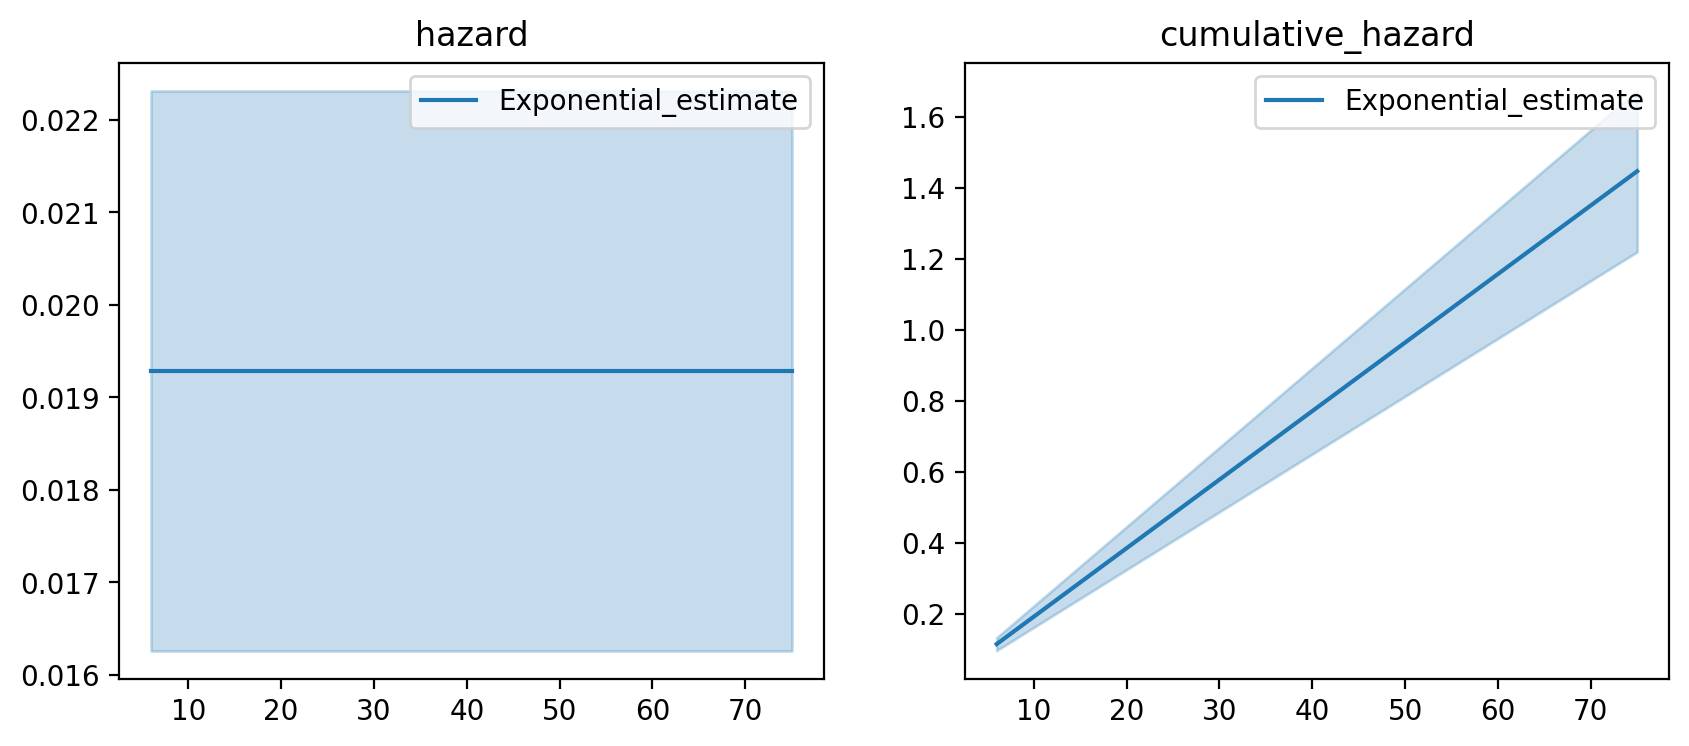

In [15]:
from lifelines import ExponentialFitter

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

epf = ExponentialFitter().fit(T, E)
epf.plot_hazard(ax=ax[0])
epf.plot_cumulative_hazard(ax=ax[1])

ax[0].set_title("hazard"); ax[1].set_title("cumulative_hazard")

epf.print_summary(3)

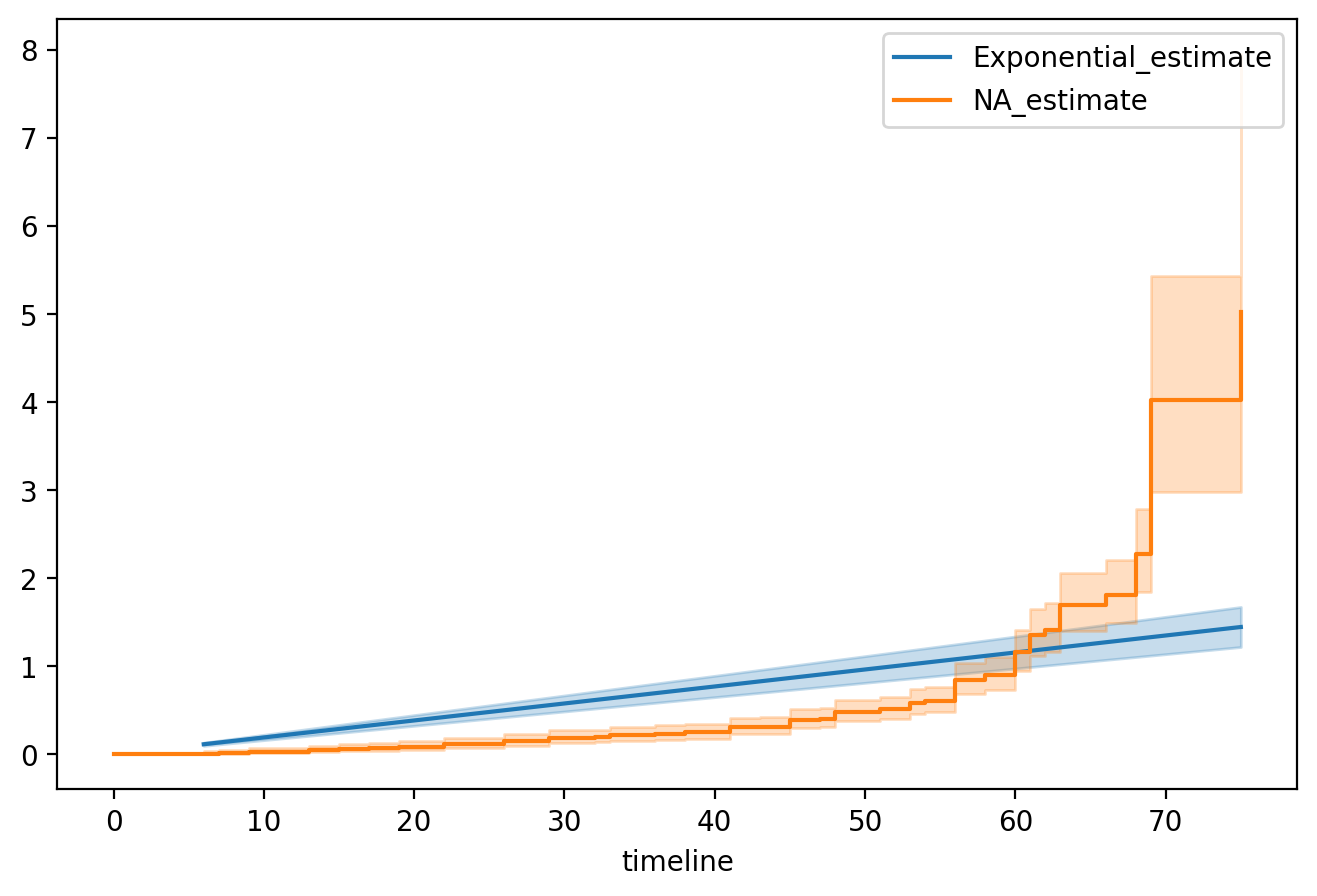

In [16]:
from lifelines import NelsonAalenFitter

ax = epf.plot(figsize=(8,5))

naf = NelsonAalenFitter().fit(T, E)
ax = naf.plot(ax=ax)
plt.legend()

<lifelines.PiecewiseExponentialFitter:"PiecewiseExponential_estimate", fitted with 163 total observations, 7 right-censored observations>
   number of observations = 163
number of events observed = 156
           log-likelihood = -647.118
               hypothesis = lambda_0_ != 1, lambda_1_ != 1, lambda_2_ != 1

---
             coef  se(coef)  coef lower 95%  coef upper 95%
lambda_0_ 163.111    27.185         109.829         216.393
lambda_1_  31.364     4.042          23.441          39.287
lambda_2_   4.686     0.624           3.462           5.909

           cmp to     z       p  -log2(p)
lambda_0_   1.000 5.963 <0.0005    28.591
lambda_1_   1.000 7.512 <0.0005    43.961
lambda_2_   1.000 5.902 <0.0005    28.056
---
AIC = 1300.235

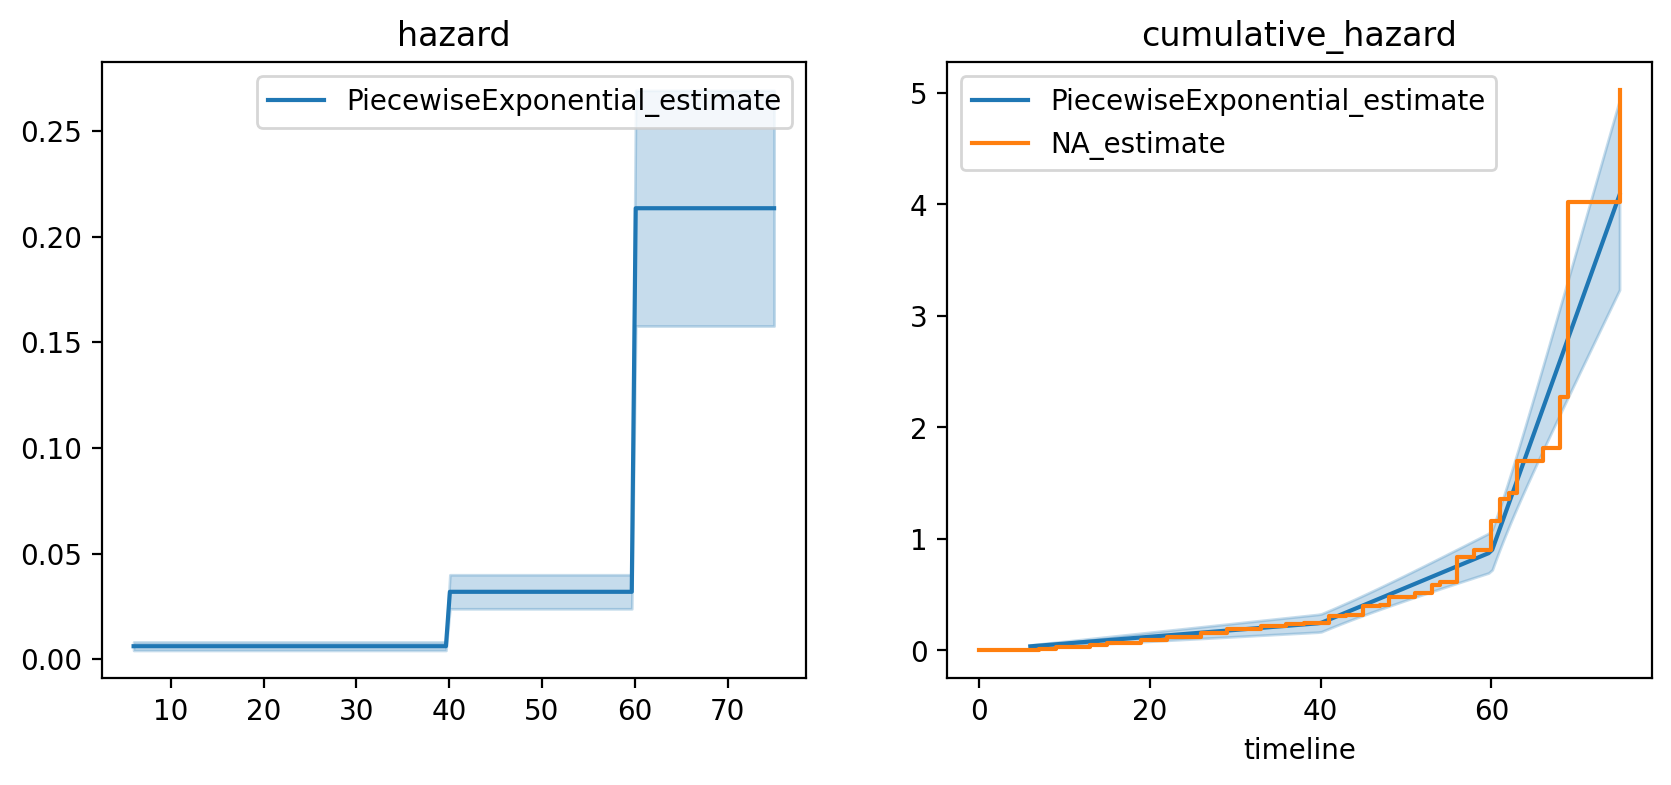

In [17]:
from lifelines import PiecewiseExponentialFitter

# looking at the above plot, I think there may be breaks at t=40 and t=60.
pf = PiecewiseExponentialFitter(breakpoints=[40, 60]).fit(T, E)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax = pf.plot(ax=axs[1])
pf.plot_hazard(ax=axs[0])

ax = naf.plot(ax=ax, ci_show=False)
axs[0].set_title("hazard"); axs[1].set_title("cumulative_hazard")

pf.print_summary(3)

In [5]:
import pandas as pd
from lifelines import WeibullFitter, LogNormalFitter, LogLogisticFitter

# Exemplo de dataframe com tempos de sobrevivência (duration) e um indicador de censura (event_observed)
df = pd.DataFrame({
    'duration': [5, 6, 6, 2, 4, 3, 7, 8, 5, 6, 7],
    'event_observed': [1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0]  # 1 = evento ocorreu, 0 = censurado
})

# Ajustar o modelo Weibull
weibull_model = WeibullFitter()
weibull_model.fit(df['duration'], event_observed=df['event_observed'])

# Exibir o resumo do modelo
print(weibull_model.summary)

             coef  se(coef)  coef lower 95%  coef upper 95%  cmp to         z  \
lambda_  6.899192  1.092720        4.757500        9.040884     1.0  5.398631   
rho_     2.435048  0.808226        0.850954        4.019142     1.0  1.775553   

                    p   -log2(p)  
lambda_  6.715145e-08  23.828006  
rho_     7.580662e-02   3.721532  


In [9]:
from lifelines import WeibullAFTFitter

# Ajustar o modelo AFT Weibull
aft_model = WeibullAFTFitter()
aft_model.fit(df, duration_col='duration', event_col='event_observed')

# Exibir o resumo do modelo
print(aft_model.summary)


AttributeError: module 'formulaic' has no attribute 'ModelSpec'

In [8]:
from lifelines import WeibullAFTFitter

# Ajustar o modelo AFT Weibull
aft_model = WeibullAFTFitter()
aft_model.fit(df, duration_col='duration', event_col='event_observed')

# Exibir o resumo do modelo
print(aft_model.summary)


AttributeError: module 'formulaic' has no attribute 'ModelSpec'

In [10]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.duration.hazard_regression import PHReg

# Exemplo de dataframe com covariáveis e duração
df = pd.DataFrame({
    'duration': [5, 6, 6, 2, 4, 3, 7, 8, 5, 6, 7],
    'event_observed': [1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0],
    'age': [34, 45, 23, 45, 34, 65, 50, 29, 33, 44, 22],
    'gender': [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]  # 1 = masculino, 0 = feminino
})

# Definir variáveis independentes (X) e a dependente (Y)
X = df[['age', 'gender']]
Y = df[['duration', 'event_observed']]

# Ajustar o modelo de Riscos Proporcionais de Cox (PH)
cox_model = PHReg.from_formula('duration ~ age + gender', df, status='event_observed')
cox_result = cox_model.fit()

# Exibir o resumo do modelo
print(cox_result.summary())


                       Results: PHReg
Model:                    PH Reg        Sample size:      11
Dependent variable:       duration      Num. events:      7 
Ties:                     Breslow                           
------------------------------------------------------------
        log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
------------------------------------------------------------
age     0.0322    0.0335 1.0327  0.9607 0.3367 0.9671 1.1027
gender -1.3742    0.8473 0.2530 -1.6218 0.1049 0.0481 1.3319
Confidence intervals are for the hazard ratios


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\iolib\summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Weibull

# Exemplo de dataframe com covariáveis e duração
df = pd.DataFrame({
    'duration': [5, 6, 6, 2, 4, 3, 7, 8, 5, 6, 7],
    'event_observed': [1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0],
    'age': [34, 45, 23, 45, 34, 65, 50, 29, 33, 44, 22],
    'gender': [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]  # 1 = masculino, 0 = feminino
})

# Ajustar o modelo Weibull (AFT)
aft_model = sm.duration.Survreg.from_formula('duration ~ age + gender', df, status='event_observed', dist='weibull')
aft_result = aft_model.fit()

# Exibir o resumo do modelo
print(aft_result.summary())


ImportError: cannot import name 'Weibull' from 'statsmodels.discrete.discrete_model' (c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py)

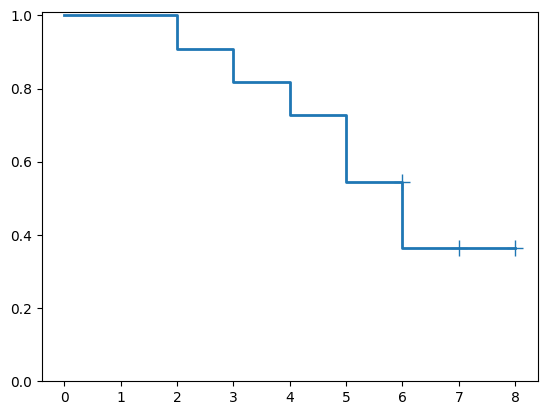

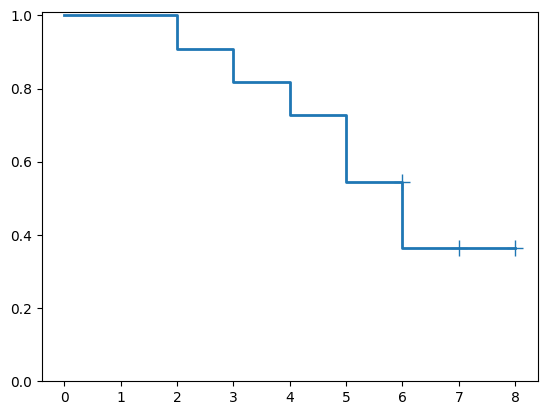

In [12]:
from statsmodels.duration.survfunc import SurvfuncRight

# Criar a função de sobrevivência (Kaplan-Meier)
kmf = SurvfuncRight(df['duration'], df['event_observed'])

# Plotar a função de sobrevivência
kmf.plot()


In [13]:
from statsmodels.duration.hazard_regression import PHReg

# Ajustar o modelo de Weibull com o AFT
aft_model = sm.duration.Survreg.from_formula('duration ~ age + gender', df, status='event_observed', dist='weibull')
aft_result = aft_model.fit()

# Exibir o resumo do modelo
print(aft_result.summary())


AttributeError: module 'statsmodels.duration.api' has no attribute 'Survreg'